<img align="right" style="padding-right:10px;" src="figures_wk4/guinea_pig.png" width=300><br>
# Week 4 Lab - Hypothesis Testing

 This week's assignment will give you some practice defining and testing a hypothesis.

## Our Dataset: 
**Dataset Name::** ToothGrowth.csv (locted in the assign_wk4 folder)<br>
The tooth growth dataset describes the length of the odontoblasts (teeth) in each of 10 guinea pigs at three Vitamin C dosage levels (0.5, 1, and 2 mg) with two delivery methods (orange juice or ascorbic acid).

The file contains 60 observations of 3 variables <br>
len : Tooth length <br>
supp : Supplement type (VC or OJ)<br>
dose : Dose in milligrams<br>


# Assignment Requirements

Hypothesis testing for the given dataset. Your analysis should include the following:
   1. Graphically describe the dataset
      - This could include box plots, histograms, etc.
      - Provide a summary of your initial findings about the dataset.
   2. Check of data normality, using both methods
      - Graphically  check for normality
      - Statistical test for normality
   3. Defined a null and alternative hypothesis (Ho and Ha) for the dataset
      - Be specific and clear in your definitions
   4. Hypothesis testing 
      - Explain why you chose the test(s) you are using
      - Summarize your findings from the test(s) you performed
   5. Conclusion based on your analysis
      - Be sure to defend your conclusion. Include supporting information for your analysis.
   6. Refine your initial hypothesis and repeat steps 3 through 5
      - How did the outcome(s) change between your original Ho/Ha and your refined Ho/Ha?

**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ToothGrowth.csv', index_col=[0])

In [3]:
df.head()

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5


(array([ 5.,  7.,  3.,  7.,  8.,  5.,  9., 11.,  3.,  2.]),
 array([ 4.2 ,  7.17, 10.14, 13.11, 16.08, 19.05, 22.02, 24.99, 27.96,
        30.93, 33.9 ]),
 <BarContainer object of 10 artists>)

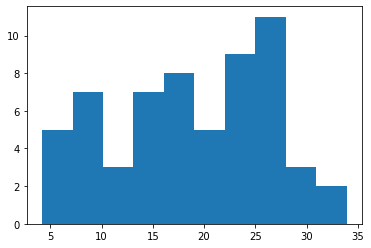

In [5]:
#histogram of tooth lengths and summary description of dataset
plt.hist(df['len'])

In [10]:
df.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


The average tooth lenth is nearly 19mm (I assume--unit is not mentioned). The standard deviation of 7.65 and min/max difference of 20+mm indicate a fairly spread out distribution.

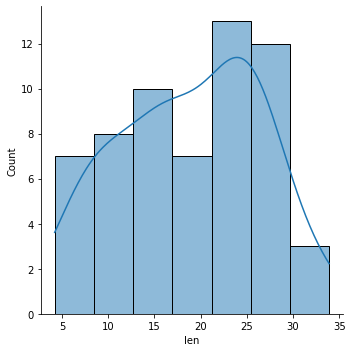

In [6]:
#replot in seaborn with a shape line
sns.displot(df['len'],kde=True)

The data is somewhat close to normal, but definitely looks a bit off. A probability plot and some statistical tests will help evaluate normality further.

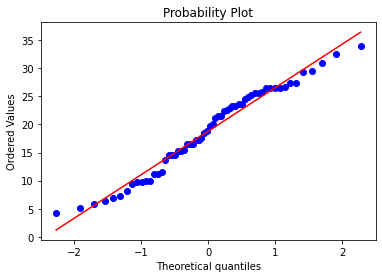

In [7]:
import scipy.stats as stats
res = stats.probplot(df['len'], plot=plt)

The probability plot values line up quite well with diagonal line, indicating the distribution is pretty normal.

In [14]:
#statistical tests for normality
from scipy.stats import shapiro

In [15]:
stat, p = shapiro(df['len'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.967, p=0.109


In [16]:
from scipy.stats import normaltest

stat, p = normaltest(df['len'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=6.490, p=0.039


In [18]:
print(f'Skewness: {df["len"].skew()}')
print(f'Kurtosis: {df["len"].kurt()}') 

Skewness: -0.14995189829252065
Kurtosis: -0.9549824842435792


Although D’Agostino’s K^2 test had a p-value below 0.05 and means we'd reject the null hypothesis, all other statistical tests, including skewness and kurtosis values, are non-significant and/or fall within an acceptable range, so it's reasonable to consider the distribution of this dataset normal.

Null hypothesis: There are no differences in tooth length between the guniea pigs in the Vitamin C and OJ groups.
Alternative hypothesis: Guinea pigs treated with OJ will have longer teeth than those who received Vitamin C.
A t-test will allow me to compare the two groups and determine whether they have statistically significant differences in tooth length.

In [22]:
#splitting the data by treatment type
oj, vc = [x for _, x in df.groupby(df['supp'])]

In [23]:
vc.head()

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5


In [24]:
oj.head()

,len,supp,dose
31,15.2,OJ,0.5
32,21.5,OJ,0.5
33,17.6,OJ,0.5
34,9.7,OJ,0.5
35,14.5,OJ,0.5


In [25]:
#hypothesis tests code
from scipy.stats import ttest_1samp
ttest,pval = stats.ttest_rel(vc['len'], oj['len'])
print(f'p-value: {pval}')

p-value: 0.0025498424133060605


In [30]:
#getting the average tooth length for each group
oj['len'].mean()

20.66333333333333

In [31]:
vc['len'].mean()

16.96333333333333

The t-test showed a p-value of 0.0025, indicating we can reject the null hypothesis. In addition, the average tooth length for the OJ group is 20.67 compared to 16.96 for the Vitamin C group, supporting my hypothesis that the OJ group would have longer teeth.

Since the data supported my initial hypothesis, I will drill down a bit further and investigate the impact of dosage levels on tooth length.
New null hypothesis: There will be no difference in tooth length between the three different levels of OJ doses.
New alternative hypothesis: Average tooth length wil be significantly longer for guinea pigs getting higher doses of OJ.

In [35]:
low = oj[oj['dose']==0.5]
med = oj[oj['dose']==1.0]
high = oj[oj['dose']==2.0]
low.head()

,len,supp,dose
31,15.2,OJ,0.5
32,21.5,OJ,0.5
33,17.6,OJ,0.5
34,9.7,OJ,0.5
35,14.5,OJ,0.5


In [37]:
#one-way ANOVA to compare the three doses
from scipy.stats import f_oneway
f_oneway(low['len'], med['len'], high['len'])

F_onewayResult(statistic=31.44150432117441, pvalue=8.88716414575965e-08)

In [38]:
print(low['len'].mean())
print(med['len'].mean())
print(high['len'].mean())

13.23
22.7
26.060000000000002


The p-value for the ANOVA comparing the three groups is nearly zero, so we can reject the null hypothesis. Sure enough, the group with the highest dose of OJ had the longest teeth, and the group with the smallest dose had the shortest teeth.

# Deliverables:
Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.